In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from glacier import glacier
import cmocean

cmap=cmocean.cm.haline

In [26]:
ngridx=50
ngridz=20
D=200
L=2e3
dt= 2e2
T= 5e5
zz=50
C,S=glacier(ngridx,ngridz,dt,zz,T)

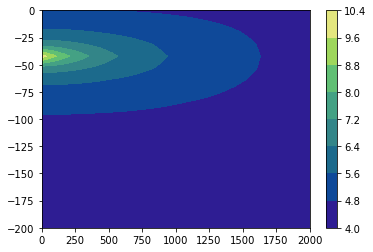

In [27]:
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L,ngridx)
X,Z=np.meshgrid(x,z)
plt.contourf(X,-Z,C[-1,:,:].T,cmap=cmap)
plt.colorbar()